In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import numpy as np

# US Govenment vs Other Government

In [2]:
data = pd.read_csv('us_gov_oth_gov.csv')
#data = pd.read_csv('us_gov_oth_bus.csv')              ## Only US Government vs Others Business
#data = pd.read_csv('us_bus_oth_gov.csv')              ## Only US Business vs Others Government
#data = pd.read_csv('us_bus_oth_bus.csv')              ## Only US Business vs Others Business
#data = pd.read_csv('overall_data.csv')                ## All government and business data

In [3]:
df = pd.DataFrame(data)
df

,Date,TargetCountry,TargetCountryCode,ReceivingCountry,ReceivingCountryCode,Action,NumArticles,AvgTone,AvgGoldsteinScale,Action Name
0,20160101,USA,GOV,FIN,GOV,40,10,1.762115,1.0,"Consult, not specified below"
1,20160101,USA,GOV,FRA,GOV,10,6,-1.574803,0.0,"Make statement, not specified below"
2,20160101,USA,GOV,FRA,GOV,14,6,-1.980198,0.0,Consider policy option
3,20160101,USA,GOV,FRA,GOV,40,1,-0.847458,1.0,"Consult, not specified below"
4,20160101,USA,GOV,DEU,GOV,10,6,0.000000,0.0,"Make statement, not specified below"
...,...,...,...,...,...,...,...,...,...,...
118002,20240528,USA,GOV,ISR,GOV,46,8,-0.584795,7.0,Engage in negotiation
118003,20240528,USA,GOV,ESP,GOV,180,2,-0.196078,-9.0,"Use unconventional violence, not specified below"
118004,20240528,USA,GOV,GBR,GOV,46,10,1.562500,7.0,Engage in negotiation
118005,20240528,USA,GOV,EGY,GOV,70,1,-6.031128,7.0,"Provide aid, not specified below"


In [4]:
def weighted_avg(df, values, weights):
    return (df[values] * df[weights]).sum() / df[weights].sum()


## Countrywise Analysis

In [9]:
# to find the total articles released on particular action by each country
grouped_data = data.groupby(['ReceivingCountry', 'Action Name']).agg({'NumArticles': 'sum','AvgTone': 'mean', 'AvgGoldsteinScale': 'mean'}).reset_index()
grouped_data

,ReceivingCountry,Action Name,NumArticles,AvgTone,AvgGoldsteinScale
0,ARE,Accede to demands for change in leadership,3,1.129944,5.0
1,ARE,Accuse of human rights abuses,1,-1.614531,-2.0
2,ARE,Accuse of war crimes,4,-5.183164,-2.0
3,ARE,Appeal for diplomatic cooperation (such as pol...,10,-1.329133,3.2
4,ARE,Appeal for judicial cooperation,10,-3.571429,3.4
...,...,...,...,...,...
3644,ZAF,Share intelligence or information,10,-0.143266,7.0
3645,ZAF,Sign formal agreement,51,-2.830229,8.0
3646,ZAF,"Threaten with military force, not specified below",7,-6.422382,-7.0
3647,ZAF,"Use unconventional violence, not specified below",17,-5.050776,-9.0


In [8]:
grouped_data = data.groupby(['ReceivingCountry', 'Action Name']).agg(
    NumArticles=('NumArticles', 'sum'),
    AvgTone = ('AvgTone', 'mean'),
    Wei_AvgTone=('AvgTone', lambda x: weighted_avg(data.loc[x.index], 'AvgTone', 'NumArticles')),
    AvgGoldsteinScale = ('AvgGoldsteinScale', 'mean'),
    Wei_AvgGoldsteinScale= ('AvgGoldsteinScale', lambda x: weighted_avg(data.loc[x.index], 'AvgGoldsteinScale', 'NumArticles'))
).reset_index()
grouped_data

,ReceivingCountry,Action Name,NumArticles,AvgTone,Wei_AvgTone,AvgGoldsteinScale,Wei_AvgGoldsteinScale
0,ARE,Accede to demands for change in leadership,3,1.129944,1.129944,5.0,5.0
1,ARE,Accuse of human rights abuses,1,-1.614531,-1.614531,-2.0,-2.0
2,ARE,Accuse of war crimes,4,-5.183164,-5.183164,-2.0,-2.0
3,ARE,Appeal for diplomatic cooperation (such as pol...,10,-1.329133,-1.329133,3.2,3.2
4,ARE,Appeal for judicial cooperation,10,-3.571429,-3.571429,3.4,3.4
...,...,...,...,...,...,...,...
3644,ZAF,Share intelligence or information,10,-0.143266,-0.143266,7.0,7.0
3645,ZAF,Sign formal agreement,51,-2.830229,-2.854728,8.0,8.0
3646,ZAF,"Threaten with military force, not specified below",7,-6.422382,-6.491538,-7.0,-7.0
3647,ZAF,"Use unconventional violence, not specified below",17,-5.050776,-4.739464,-9.0,-9.0


In [10]:
# top ten most frequent "Action" values
action_counts = data['Action Name'].value_counts()
top_ten_actions = action_counts.head(10)
top_ten_actions

Consult, not specified below                        18783
Engage in negotiation                                9500
Express intent to meet or negotiate                  8814
Make statement, not specified below                  8620
Host a visit                                         8607
Praise or endorse                                    8503
Make a visit                                         8190
Make an appeal or request, not specified below       7152
Express intent to cooperate, not specified below     2697
Make optimistic comment                              2518
Name: Action Name, dtype: int64

In [11]:
# Top 'n' actions taken towards US Government by each country
n = 3  # customizable, I am using top 3 here
top_actions = grouped_data.groupby('ReceivingCountry').apply(lambda x: x.nlargest(n, 'NumArticles')).reset_index(drop=True)
top_actions

,ReceivingCountry,Action Name,NumArticles,AvgTone,AvgGoldsteinScale
0,ARE,"Consult, not specified below",932,0.889118,1.0
1,ARE,Engage in negotiation,451,1.556762,7.0
2,ARE,Make a visit,451,1.719856,1.9
3,AUS,"Consult, not specified below",7695,-0.881679,1.0
4,AUS,Engage in negotiation,2828,-1.198514,7.0
...,...,...,...,...,...
133,TWN,Praise or endorse,854,-0.825629,3.4
134,TWN,Make a visit,658,-0.048970,1.9
135,ZAF,"Consult, not specified below",837,-0.834996,1.0
136,ZAF,Make a visit,532,-0.212141,1.9


In [13]:
# top ten most frequent "Action" values among top actions
action_counts_b = top_actions['Action Name'].value_counts()
top_ten_actions_b = action_counts_b.head(10)
top_ten_actions_b

Consult, not specified below                      46
Engage in negotiation                             26
Express intent to meet or negotiate               24
Praise or endorse                                 15
Make a visit                                       9
Host a visit                                       8
Make statement, not specified below                7
Make pessimistic comment                           1
Make an appeal or request, not specified below     1
Halt negotiations                                  1
Name: Action Name, dtype: int64

This shows that Action 40 appeared 46 times among the top action list

In [17]:
# to get top 3 actions by particular country.
my_country = 'IND'     # customizable 
country_top = top_actions[top_actions['ReceivingCountry'] == f'{my_country}']
country_top

,ReceivingCountry,Action Name,NumArticles,AvgTone,AvgGoldsteinScale
66,IND,"Consult, not specified below",8832,0.067790,1.0
67,IND,Host a visit,5024,0.704947,2.8
68,IND,Express intent to meet or negotiate,4783,0.277605,4.0


In [19]:
tact = country_top['Action Name'].tolist()
ttone = country_top['AvgTone'].tolist()
#wtone = country_top['Wei_AvgTone'].tolist()
print('Top 3 actions taken by country',my_country, '=\n', tact)
print('\nAverage tone of top 3 actions taken by country',my_country, '=\n', ttone)
#print('\nWeighted average tone of top 3 actions taken by country',my_country, '=\n', wtone)

Top 3 actions taken by country IND =
 ['Consult, not specified below', 'Host a visit', 'Express intent to meet or negotiate']

Average tone of top 3 actions taken by country IND =
 [0.06778993475335776, 0.704946563038674, 0.27760543233867274]


## Overall Analysis

In [20]:
unique_countries = data[['TargetCountry', 'ReceivingCountry']].drop_duplicates()
unique_countries_name = unique_countries.sort_values(by=['ReceivingCountry'])
unique_countries_list = unique_countries_name['ReceivingCountry'].tolist()
print(unique_countries_list)

['ARE', 'AUS', 'AUT', 'BEL', 'BRA', 'CAN', 'CHE', 'CHL', 'CHN', 'COL', 'CZE', 'DEU', 'DNK', 'EGY', 'ESP', 'FIN', 'FRA', 'GBR', 'GRC', 'HKG', 'HUN', 'IDN', 'IND', 'IRL', 'ISR', 'ITA', 'JPN', 'KOR', 'KWT', 'MEX', 'MYS', 'NLD', 'NOR', 'NZL', 'PER', 'PHL', 'POL', 'PRT', 'QAT', 'SAU', 'SGP', 'SWE', 'THA', 'TUR', 'TWN', 'ZAF']


In [21]:
action_analysis_all = data.groupby(['Action Name']).agg(
    AvgTone = ('AvgTone', 'mean'),
    Wei_AvgTone = ('AvgTone', lambda x: weighted_avg(data.loc[x.index], 'AvgTone', 'NumArticles')),
    AvgGoldsteinScale = ('AvgGoldsteinScale','mean'),
    Wei_AvgGoldsteinScale = ('AvgGoldsteinScale', lambda x: weighted_avg(data.loc[x.index], 'AvgGoldsteinScale', 'NumArticles')),
    NumInteractions= ('ReceivingCountry', 'count')
).reset_index()
#action_analysis_all

In [24]:
action_analysis_all[action_analysis_all['Action Name']=='Host a visit']

,Action Name,AvgTone,Wei_AvgTone,AvgGoldsteinScale,Wei_AvgGoldsteinScale,NumInteractions
128,Host a visit,-0.632656,-0.648303,2.8,2.8,8607


In [25]:
sorted_all = action_analysis_all.sort_values(by=['NumInteractions'], ascending=False)
sorted_all

,Action Name,AvgTone,Wei_AvgTone,AvgGoldsteinScale,Wei_AvgGoldsteinScale,NumInteractions
47,"Consult, not specified below",-0.907410,-1.086808,1.0,1.0,18783
92,Engage in negotiation,-0.947339,-1.074893,7.0,7.0,9500
111,Express intent to meet or negotiate,-0.648867,-0.665917,4.0,4.0,8814
147,"Make statement, not specified below",-1.742294,-1.759270,0.0,0.0,8620
128,Host a visit,-0.632656,-0.648303,2.8,2.8,8607
...,...,...,...,...,...,...
152,"Obstruct passage, block, not specified below",-3.987730,-3.987730,-7.5,-7.5,1
99,Express intent to allow international involvem...,-4.671968,-4.671968,7.0,7.0,1
107,Express intent to ease administrative sanctions,0.000000,0.000000,7.0,7.0,1
100,"Express intent to change institutions, regime",-6.351792,-6.351792,7.0,7.0,1


In [26]:
cact = sorted_all['Action Name'].tolist()
cact3 = cact[0:3]
ctone = sorted_all['AvgTone'].tolist()
ctone3 = ctone[0:3]
wtone = sorted_all['Wei_AvgTone'].tolist()
wtone3 = ctone[0:3]
print('Top 3 actions taken towards US by other Goverments =\n', cact3)
print('\nAverage tone of top 3 actions towards US by other Goverments =\n', ctone3)
print('\nWeighted average tone of top 3 actions towards US by other Goverments =\n', wtone3)

Top 3 actions taken towards US by other Goverments =
 ['Consult, not specified below', 'Engage in negotiation', 'Express intent to meet or negotiate']

Average tone of top 3 actions towards US by other Goverments =
 [-0.9074098783435021, -0.947339190289579, -0.6488674254480372]

Weighted average tone of top 3 actions towards US by other Goverments =
 [-0.9074098783435021, -0.947339190289579, -0.6488674254480372]


### Graphical Representation

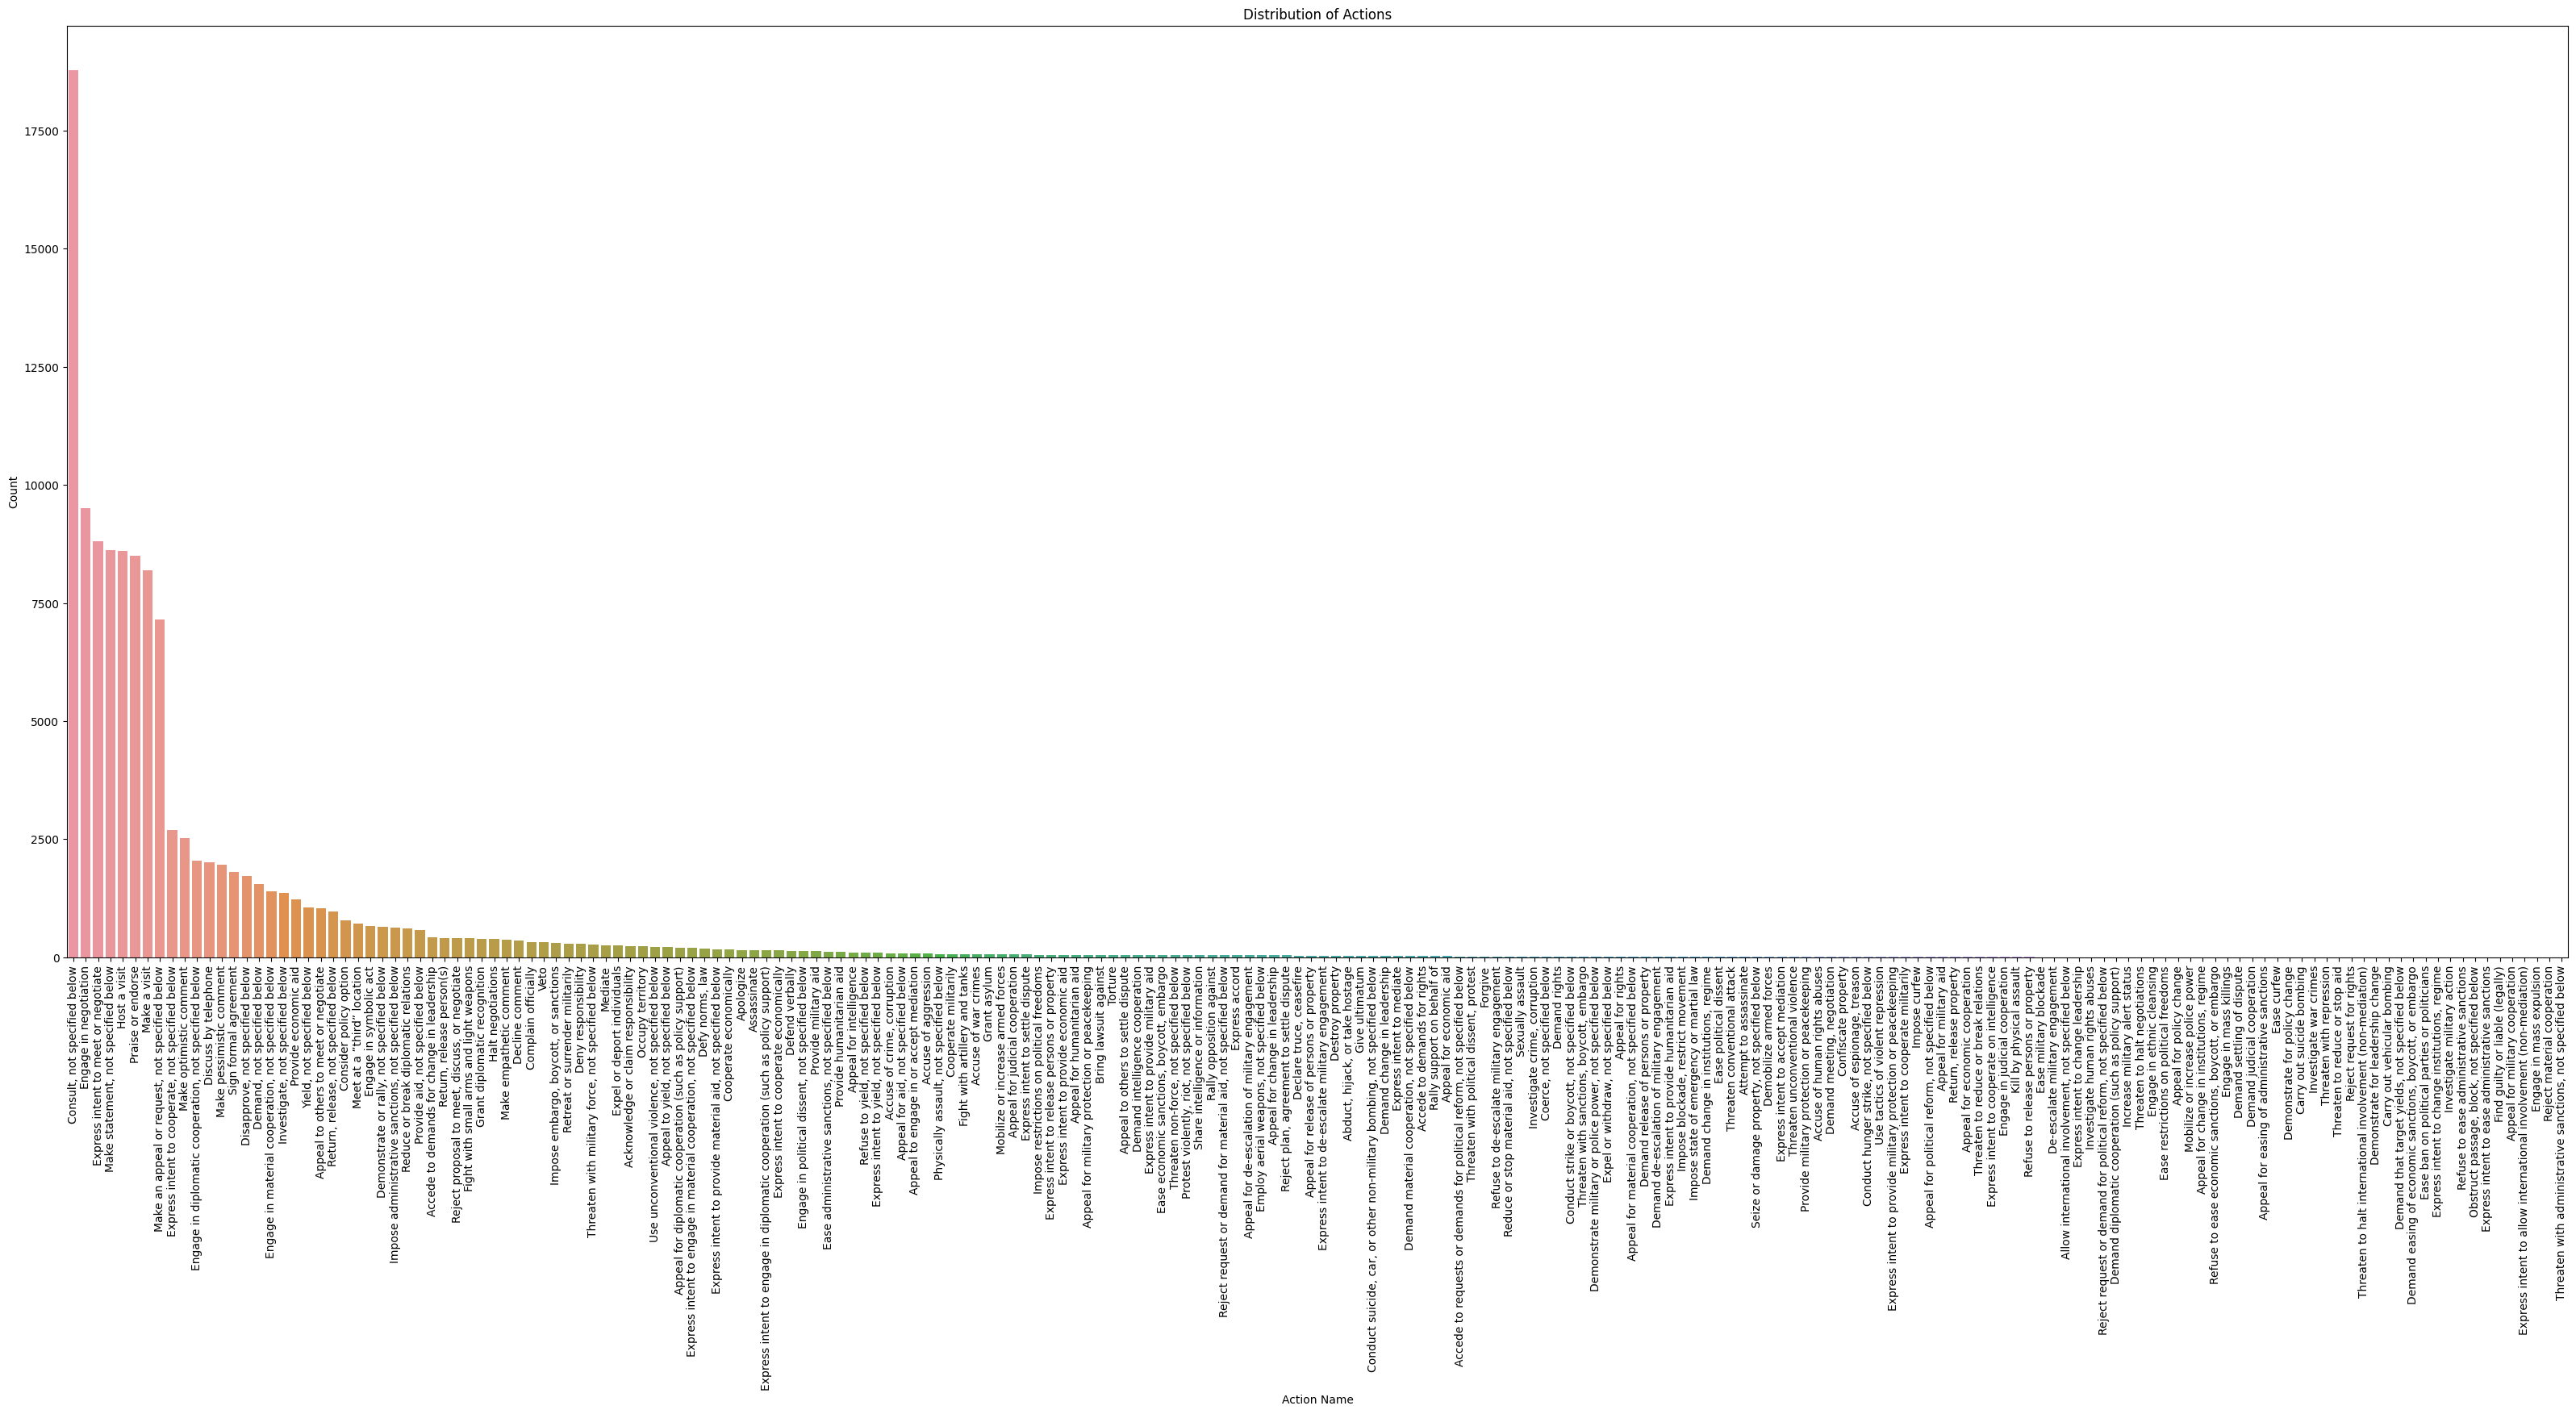

In [31]:
# Plot the distribution of actions
plt.figure(figsize=(40,15))
sns.countplot(data=data, x='Action Name', order= data['Action Name'].value_counts().index)
plt.title('Distribution of Actions')
plt.xlabel('Action Name')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


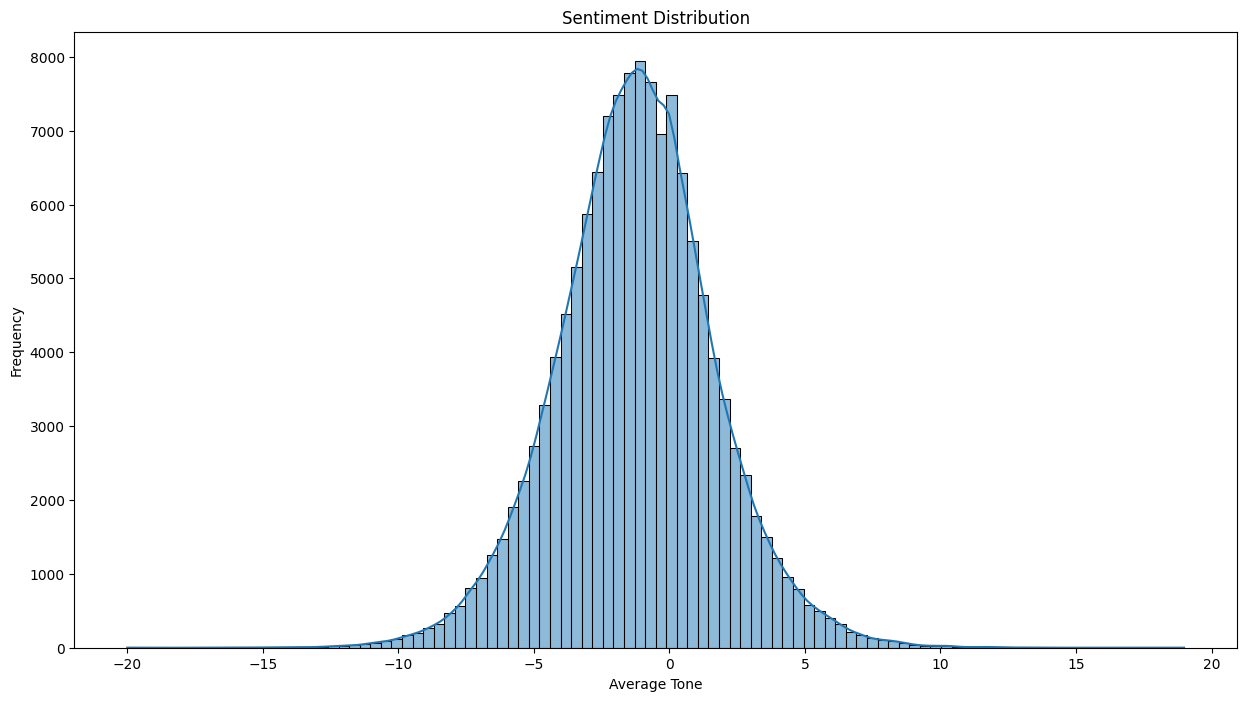

In [262]:
# Plot the sentiment distribution
plt.figure(figsize=(15, 8))
sns.histplot(data['AvgTone'], bins=100, kde=True)
#sns.displot(data['AvgTone'], kind='kde')
plt.title('Sentiment Distribution')
plt.xlabel('Average Tone')
plt.ylabel('Frequency')
plt.show()